In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df= pd.read_csv("/content/ToyotaCorolla - MLR.csv")

In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [ ]:
label_encoder=preprocessing.LabelEncoder()
df.Fuel_Type=label_encoder.fit_transform(df.Fuel_Type)

In [ ]:

df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


<Axes: >

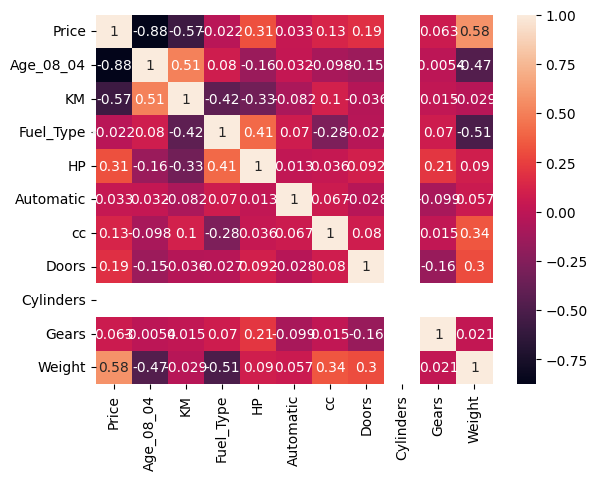

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   Fuel_Type  1436 non-null   int64
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Cylinders  1436 non-null   int64
 9   Gears      1436 non-null   int64
 10  Weight     1436 non-null   int64
dtypes: int64(11)
memory usage: 123.5 KB


In [ ]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [ ]:
X = df[['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']]
Y = df['Price']

In [ ]:
X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(x_test)


In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test_scaled)

In [ ]:
mse=mean_squared_error(y_test,y_pred)

In [ ]:
mse

3391862.4652320514

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

# Select the most important features
importance = model.coef_
print(f'Coefficients: {importance}')

MSE: 3391862.47
MAE: 992.26
R-squared: 0.68
Coefficients: [-2.29391702e+03 -5.92975098e+02  1.80231326e+02  4.47810976e+02
  3.68588476e+01 -3.26968377e+02 -6.18641753e+01  5.68434189e-14
  1.11858809e+02  1.43123367e+03]


In [ ]:
X1 = df[['Age_08_04', 'KM', 'Fuel_Type', 'HP','Gears','Weight']]
#X1 = df[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears']]
Y1 = df['Price']

In [ ]:
X1_train,x1_test,y1_train,y1_test=train_test_split(X1,Y1,test_size=0.3,random_state=11)

In [ ]:
model1=LinearRegression()
model1.fit(X1_train,y1_train)

LinearRegression()

In [ ]:
y1_pred=model1.predict(x1_test)

In [ ]:
mae = mean_absolute_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

MSE: 3391862.47
MAE: 967.75
R-squared: 0.83


Assignment questions


In [ ]:
"""


Answer 1 == a.Normalization scales the data to a fixed range, typically [0, 1] we use normalization when there is no outliers used for k nearest neighbour and neural networks
               b.Standardization scales the data so that it has a mean of 0 and a standard deviation of 1 used when data have outliers used for pca ,linear regression and svm
Answer 2 == Techniques to Address Multicollinearity
a.principle component analysis
b.ridge and lasso regression
c.variance inflaion factor


"""

